In [1]:
# import packages
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read in dataset
blotter = pd.read_csv("police_incident_blotter_data.csv")

In [23]:
blotter.shape[0]

2936

In [24]:
blotter.shape[1]

15

In [26]:
blotter.sample(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
1427,308119434,23046092,24,2023-03-29T16:11:00,"700 Block 2nd Ave Pittsburgh, PA 15219",Y,Bluff,2,DISORDERLY CONDUCT,5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,103.0,6.0,6.0,-79.994591,40.435335
2731,308706957,23050509,6,2023-04-06T12:10:00,"6100 Block Carver St Pittsburgh, PA 15206",N,Larimer,5,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,1208.0,9.0,2.0,-79.916347,40.465716
2206,306340447,23034937,27,2023-03-08T16:55:00,"Ohio River Blvd & Mckees Rocks Brg Pittsburgh,...",N,Brighton Heights,1,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,2701.0,1.0,1.0,-80.043853,40.479563
276,306464899,23035353,10,2023-03-09T13:40:00,"1400 Block Boyle St Pittsburgh, PA 15212",N,Central North Side,1,SIMPLE ASSAULT,"2701(a)(1) Simple Assault - Intent., Know., Re...",2206.0,6.0,1.0,-80.006214,40.457590
2807,307457036,23041723,99,2023-03-21T18:37:00,"1400 Block Centre Ave Pittsburgh, PA 15219",N,Central Business District,2,MENTAL 201/302,9498 302 (Mental),201.0,NaN,NaN,-79.879655,40.446120
1155,308130320,23045733,6,2023-03-28T18:39:00,"3800 Block Merle St Pittsburgh, PA 15204",N,Windgap,6,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,2807.0,2.0,5.0,-80.077911,40.457800
2078,307251323,23036372,27,2023-03-10T14:30:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Point Breeze,4,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,1406.0,6.0,6.0,-79.996041,40.435040
1976,308518357,23049559,0,2023-04-04T18:49:00,"Strawberry Way & Montour Way Pittsburgh, PA 15219",Y,Central Business District,2,99,601.16 Public Urination And Defecation,201.0,6.0,6.0,-79.996780,40.441964
1432,308162351,23046554,0,2023-03-30T13:00:00,"Becks Run Rd & Madeline St Pittsburgh, PA 15210",N,Carrick,3,99,9998 Overdose Other,2902.0,4.0,3.0,-79.978727,40.396275
704,306273910,23034616,6,2023-03-08T02:24:00,"400 Block Rosedale St Pittsburgh, PA 15221",N,Homewood South,5,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,1304.0,NaN,NaN,-79.888163,40.447689


In [15]:
# Look at the INCIDENTNEIGHBORHOOD column, how many neighborhoods are included in the dataset?
blotter['INCIDENTNEIGHBORHOOD'].nunique()

92

In [37]:
# How many different zones are there?
blotter['INCIDENTZONE'].nunique()

7

In [30]:
nb = blotter.groupby('INCIDENTNEIGHBORHOOD') 
nb.first()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny Center,307671649,23042724,3,2023-03-23T15:00:00,"Cedar Ave & Lockhart St Pittsburgh, PA 15212",N,1,ROBBERY,3701 Robbery. / 2702 Aggravated Assault. / 270...,2204.0,1.0,1.0,-80.001323,40.452157
Allegheny West,306282794,23034673,27,2023-03-08T08:15:00,"800 Block Western Ave Pittsburgh, PA 15233",N,1,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,2201.0,1.0,1.0,-80.014059,40.452415
Allentown,307558931,23042205,10,2023-03-22T15:20:00,"900 Block Proctor Way Pittsburgh, PA 15210",N,3,SIMPLE ASSAULT,2701 Simple Assault.,1803.0,3.0,5.0,-79.991222,40.420461
Arlington,308169989,23046606,11,2023-03-30T13:49:00,"2800 Block Arlington Ave Pittsburgh, PA 15210",N,3,THEFT BY DECEPTION,4106 Access Device Fraud / 3922 Theft by Decep...,1603.0,3.0,3.0,-79.969268,40.417296
Arlington Heights,307018045,23038537,18,2023-03-15T20:55:00,"3100 Block Cordell Pl Pittsburgh, PA 15203",Y,3,STOLEN PROPERTY - OTHER,13(a)(16) Possession of Controlled Substance,1604.0,3.0,3.0,-79.963453,40.417717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,307696238,23042810,14,2023-03-23T17:15:00,"5500 Block Butler St Pittsburgh, PA 15201",N,2,CRIM MISCHIEF,3304 Criminal Mischief.,1011.0,7.0,2.0,-79.949119,40.483302
West End,307218993,23039973,0,2023-03-18T13:45:00,"400 Block S Main St Pittsburgh, PA 15220",N,6,99,9999 9999 - (Misc. Incident):,2019.0,2.0,5.0,-80.033094,40.441686
West Oakland,306364460,23035070,21,2023-03-08T22:35:00,"2500 Block Allequippa St Pittsburgh, PA 15213",Y,4,DUI - GENERAL IMPAIRMENT,3802(c) DUI - Highest Rate of Alcohol - BAC >=...,402.0,6.0,3.0,-79.967714,40.441126


In [45]:
nb = blotter.groupby(['INCIDENTNEIGHBORHOOD', 'HIERARCHY']) 
nb.first()

PK       CCR         INCIDENTTIME  \
INCIDENTNEIGHBORHOOD HIERARCHY                                             
Allegheny Center     0          307793488  23043215  2023-03-24T13:34:00   
                     3          307671649  23042724  2023-03-23T15:00:00   
                     5          307253266  23040405  2023-03-19T08:38:00   
                     9          306736596  23036693  2023-03-12T04:40:00   
                     10         306291421  23034672  2023-03-08T08:10:00   
...                                   ...       ...                  ...   
Windgap              0          308632418  23050041  2023-04-05T16:30:00   
                     5          307949336  23043445  2023-03-24T21:37:00   
                     6          308130320  23045733  2023-03-28T18:39:00   
                     10         308121841  23046124  2023-03-29T17:20:00   
                     18         308017098  23045360  2023-03-28T10:45:00   

                                                               INCIDENTLOCATION  \
INCIDENTNEIGHBORHOOD HIERARCHY                                                    
Allegheny Center     0                      Allegheny Sq E Pittsburgh, PA 15212   
                     3             Cedar Ave & Lockhart St Pittsburgh, PA 15212   
                     5                   700 Block Arch St Pittsburgh, PA 15212   
                     9                   600 Block 1st Ave Pittsburgh, PA 15219   
                     10             200 Block East Ohio St Pittsburgh, PA 15212   
...                                                                         ...   
Windgap              0             1600 Block Belhurst Ave Pittsburgh, PA 15204   
                     5                 3800 Block Haven St Pittsburgh, PA 15204   
                     6                 3800 Block Merle St Pittsburgh, PA 15204   
                     10         3400 Block Clearfield St N Pittsburgh, PA 15204   
                     18             1500 Block Clarkton St Pittsburgh, PA 15204   

                               CLEAREDFLAG INCIDENTZONE  \
INCIDENTNEIGHBORHOOD HIERARCHY                            
Allegheny Center     0                   Y            1   
                     3                   N            1   
                     5                   Y            1   
                     9                   Y            2   
                     10                  Y            1   
...                                    ...          ...   
Windgap              0                   N            6   
                     5                   Y            6   
                     6                   N            6   
                     10                  Y            6   
                     18                  Y            6   

                                        INCIDENTHIERARCHYDESC  \
INCIDENTNEIGHBORHOOD HIERARCHY                                  
Allegheny Center     0                                     99   
                     3                                ROBBERY   
                     5                               BURGLARY   
                     9          TAMPER WITH/FAB PHYS EVIDENCE   
                     10                        SIMPLE ASSAULT   
...                                                       ...   
Windgap              0                                     99   
                     5                               BURGLARY   
                     6                                  THEFT   
                     10                        SIMPLE ASSAULT   
                     18               STOLEN PROPERTY - OTHER   

                                                                         OFFENSES  \
INCIDENTNEIGHBORHOOD HIERARCHY                                                      
Allegheny Center     0                             9999 9999 - (Misc. Incident):    
                     3          3701 Robbery. / 2702 Aggravated Assault. / 270...   
                

In [34]:
# sum the hierarchy of all the events for each neighborhood and sort the result
rank = nb.sum()['HIERARCHY'].sort_values(ascending=False)
rank

INCIDENTNEIGHBORHOOD
Central Business District    9110
South Side Flats             3165
Mount Washington             2316
Brookline                    2076
Carrick                      2045
                             ... 
Outside State                  12
Ridgemont                       6
New Homestead                   0
East Carnegie                   0
Regent Square                   0
Name: HIERARCHY, Length: 92, dtype: int64

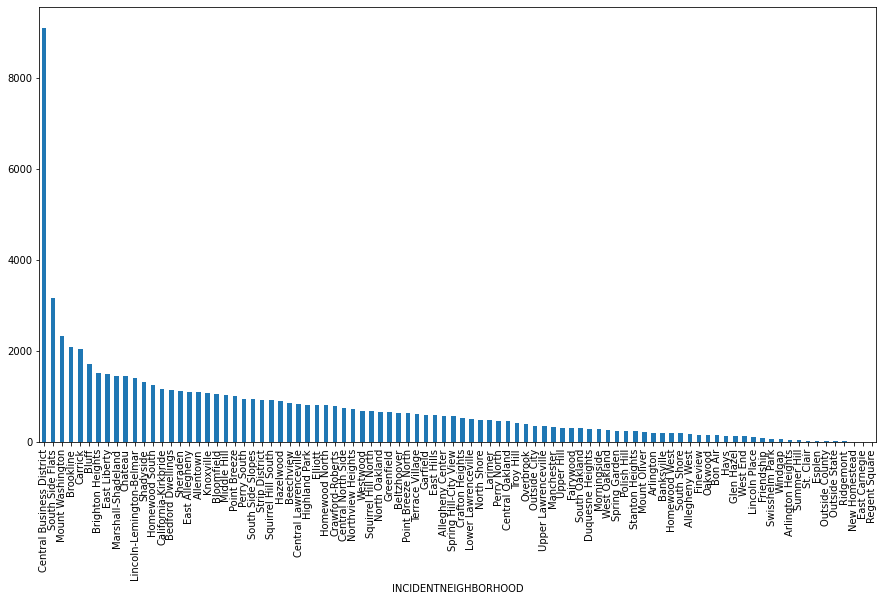

In [40]:
# plot the rank data
rank.plot.bar(figsize = (15, 8))